In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model

In [36]:
model_path = r'D:\Project\AFB\new_Linknetweights.52-0.62.h5'
model = load_model(model_path, compile=False)

In [37]:
test_data = np.load(r'D:\Project\AFB\carto_mix_256_test.npz')
x_test = test_data['arr_0']
y_test = test_data['arr_1']

print(x_test.shape)

(97, 256, 256, 3)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model


def preprocess_input(img):
    # Convert RGB image to grayscale
    gray_img = rgb2gray(img)
    # Create fake RGB image by repeating grayscale values across three channels
    fake_rgb_img = np.repeat(gray_img[..., np.newaxis], 3, axis=-1)
    # Normalize or preprocess your image data as required
    return fake_rgb_img / 255.0

# Load and preprocess a sample RGB image
sample_rgb_image = x_test[80]  # Replace with your RGB image data
processed_image = preprocess_input(sample_rgb_image)

# Create a LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Define a function for LIME to use for predictions
def predict_fn(images):
    # Debug statement to print the shape of input images
    #print("Shape of input images:", images.shape)
    
    # Make predictions using the model
    predictions = model.predict(images)
    
    # Debug statement to print the shape of predictions
    #print("Shape of predictions:", predictions.shape)
    
    # Extract the probability of the foreground class (binary segmentation)
    foreground_prob = predictions[..., 0]  # There's only one channel for binary segmentation
    
    # Return predictions reshaped to (batch_size, height*width)
    return foreground_prob.reshape(foreground_prob.shape[0], -1)

# Explain the prediction on the sample image using LIME
explanation = explainer.explain_instance(
    image=processed_image.astype('float64'),  # Ensure image is in correct format for LIME
    classifier_fn=predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000  # Number of perturbed samples to generate
)

# Get the explanation for the top label (adjust as per your model's output)
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=9,
    hide_rest=False
)

  0%|          | 0/1000 [00:00<?, ?it/s]

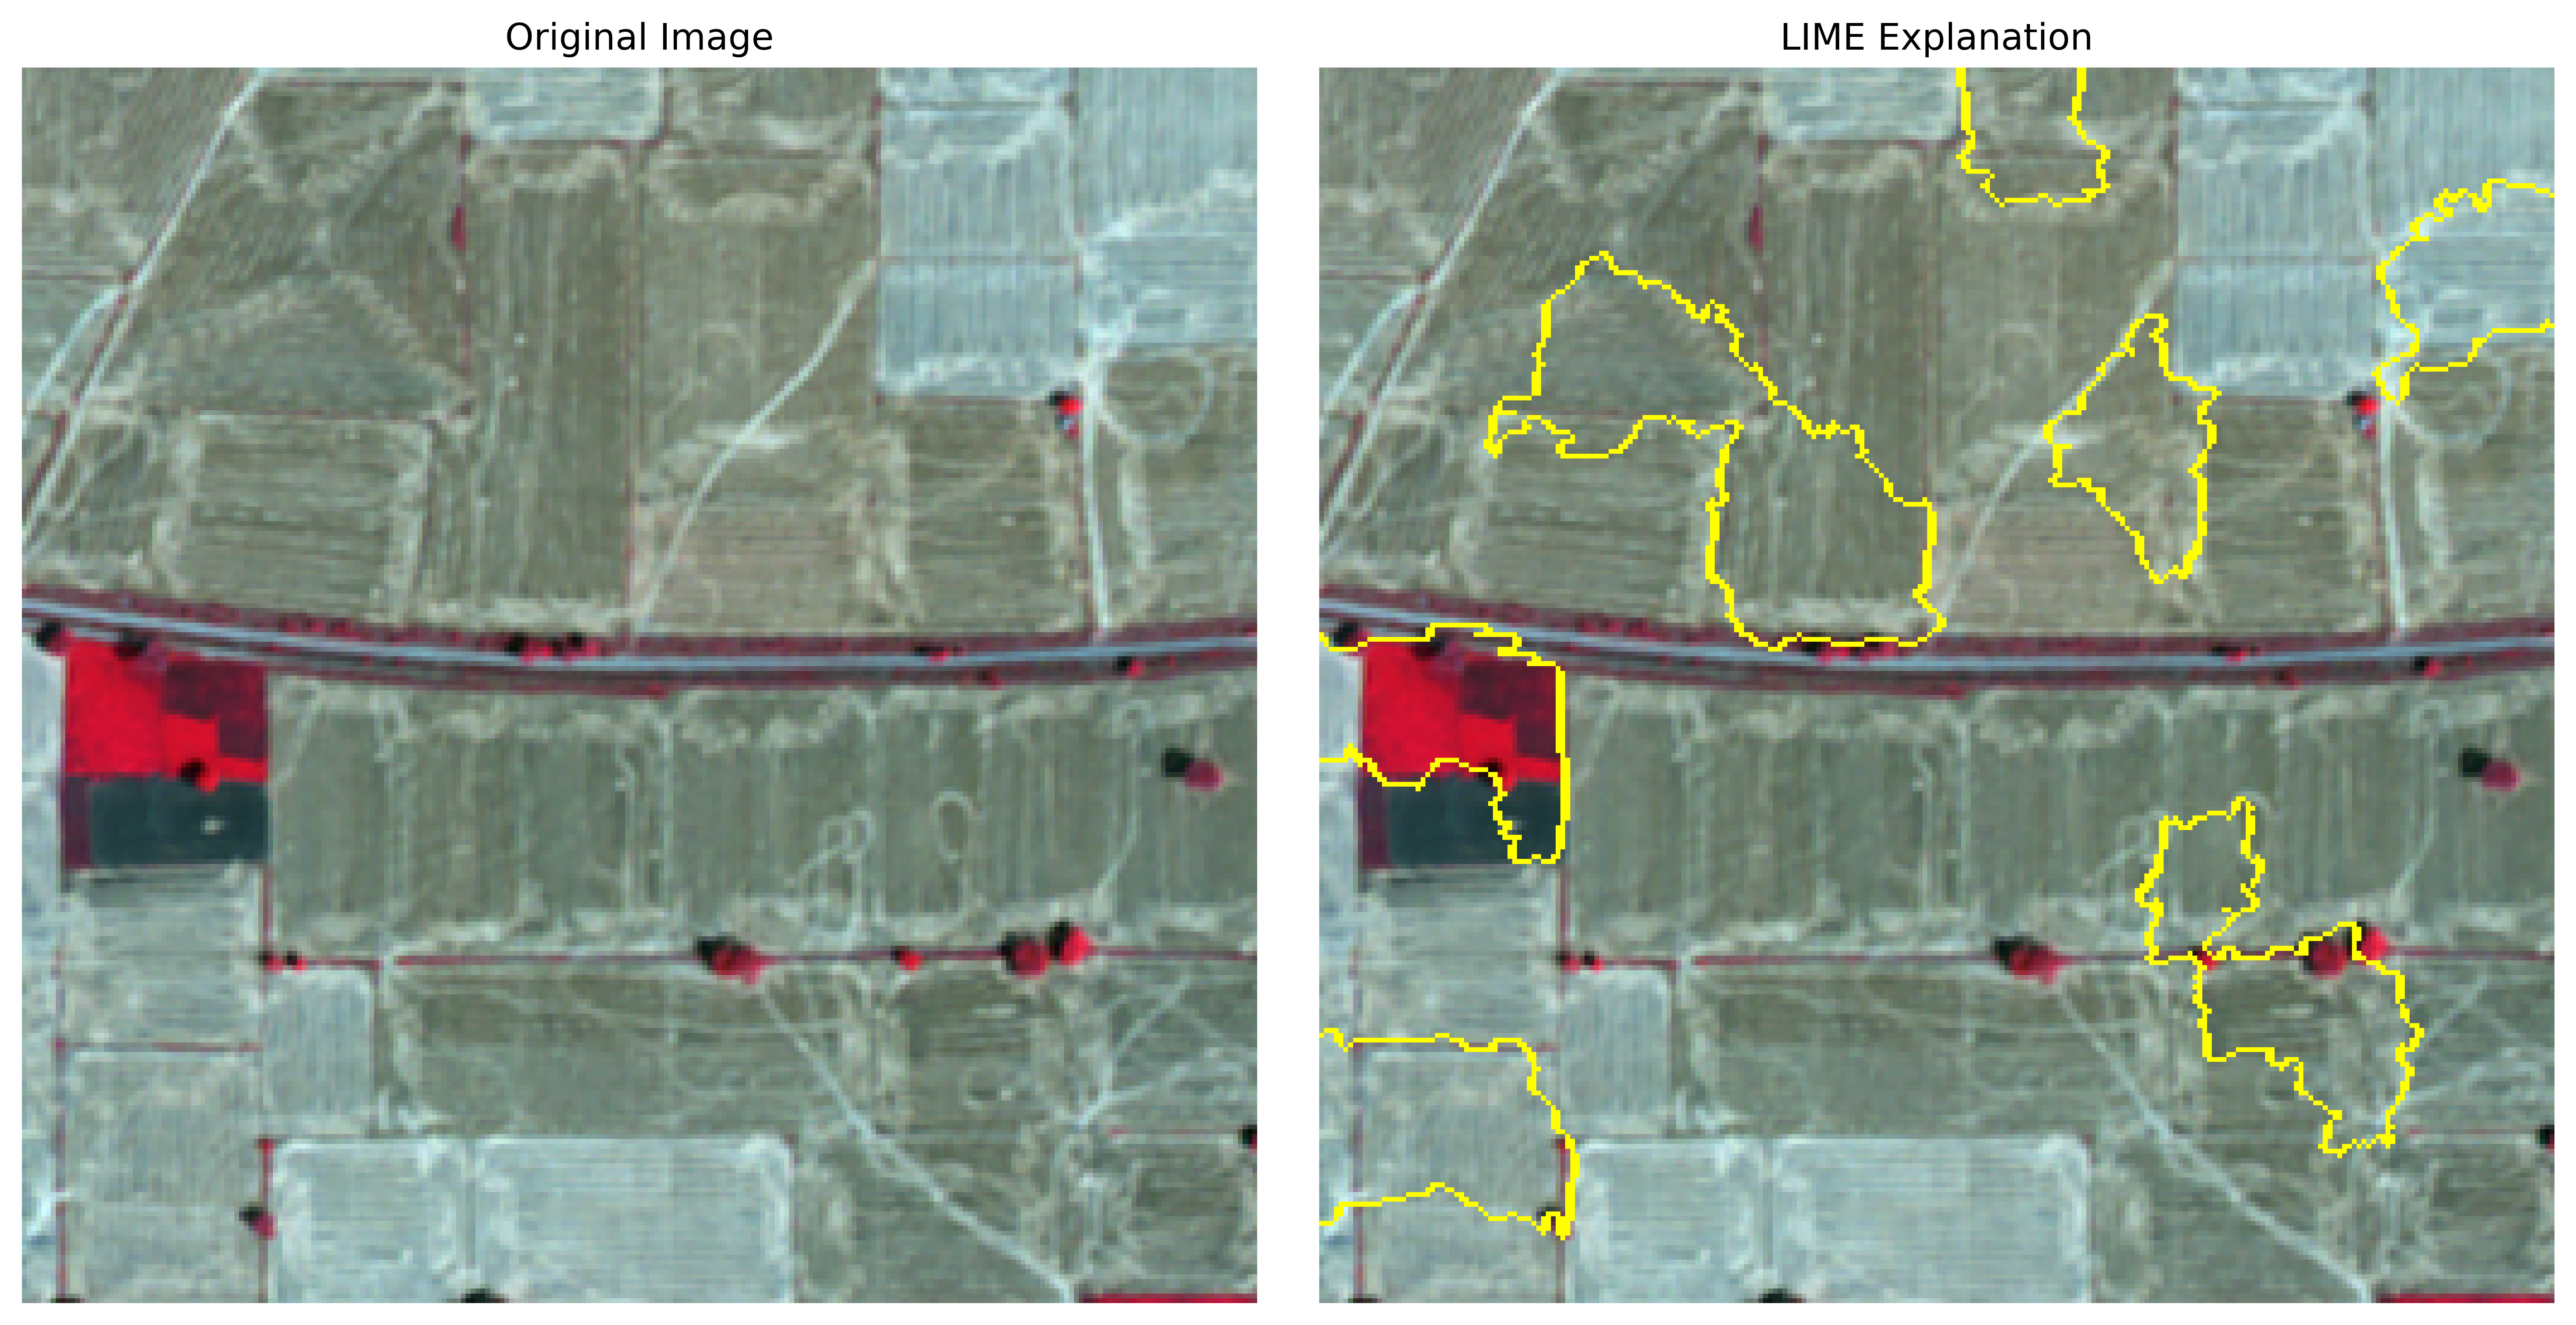

()

In [57]:
# Plot the original image and the LIME explanation side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=600)  # Set dpi to 600 for high resolution

# Plot original image
ax[0].imshow(sample_rgb_image)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Plot LIME explanation
ax[1].imshow(mark_boundaries(sample_rgb_image, mask))
ax[1].set_title('LIME Explanation')
ax[1].axis('off')

plt.tight_layout()
plt.show()
()

In [58]:
'''import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the custom prediction function
def predict_fn(images):
    predictions = model.predict(images)
    # Assuming binary segmentation, we take the output for class 1
    # Reshape predictions to (batch_size, -1) to make it 2D
    return predictions.reshape((predictions.shape[0], -1))

# Preprocess the image to be explained (ensure it's of shape (256, 256, 3))
sample_rgb_image = x_test[70]  # Replace with your RGB image data
processed_image = preprocess_input(sample_rgb_image)

# Create a background dataset for SHAP (a batch of dummy images)
background = np.zeros((1, 256, 256, 3))

# Initialize SHAP KernelExplainer with the custom predict function
explainer = shap.KernelExplainer(predict_fn, background)
print(processed_image[..., 0].shape)
# Generate SHAP values
shap_values = explainer.shap_values(processed_image[..., 0], nsamples=100)

# Reshape SHAP values back to image shape
shap_values_image = shap_values[0].reshape((256, 256, 3))

# Plot the original image and the SHAP values
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=600)

# Original image
ax[0].imshow(sample_rgb_image.astype(np.uint8))
ax[0].set_title('Original Image')

# SHAP values
ax[1].imshow(shap_values_image)
ax[1].set_title('SHAP Values')

plt.tight_layout()
plt.show()'''


"import shap\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport tensorflow as tf\n\n# Define the custom prediction function\ndef predict_fn(images):\n    predictions = model.predict(images)\n    # Assuming binary segmentation, we take the output for class 1\n    # Reshape predictions to (batch_size, -1) to make it 2D\n    return predictions.reshape((predictions.shape[0], -1))\n\n# Preprocess the image to be explained (ensure it's of shape (256, 256, 3))\nsample_rgb_image = x_test[70]  # Replace with your RGB image data\nprocessed_image = preprocess_input(sample_rgb_image)\n\n# Create a background dataset for SHAP (a batch of dummy images)\nbackground = np.zeros((1, 256, 256, 3))\n\n# Initialize SHAP KernelExplainer with the custom predict function\nexplainer = shap.KernelExplainer(predict_fn, background)\nprint(processed_image[..., 0].shape)\n# Generate SHAP values\nshap_values = explainer.shap_values(processed_image[..., 0], nsamples=100)\n\n# Reshape SHAP values back to ima